 # Table of Content
 **[Project 3: Boston House prices Problem](#Project-1:-Boston-House-prices-dataset-Problem)**
 <p>The focus of the session is to take a <b>Boston House prices</b> dataset case study by building a Linear supervised Machine Learning pipeline on a <b>Boston House prices</b> dataset samples (Dataset).</p>
 
  <p>
</p>
 <p>Our Goal is to develop a model that can predict the Boston House prices. 
    Therefore, the dataset is will be splitted into features (X) and target (y) variables.</p>
 
* ***[Part 1: Load Basic Libraries](#Part-1:-Load-Basic-Libraries)***
* ***[Part 2: Data Retrieval](#Part-2:-Data-Retrieval)***
* ***[Part 3: Data Preparation](#Part-3:-Data-Preparation)***
* ***[Part 4: Modelling](#Part-4:-Modelling)***
* ***[Part 5: Model Deployment](#Part-5:-Model-Deployment)***
* ***[Part 6: Model to Predict New Data](#Part-6:-Model-to-Predict-New-Data)***

### Part 1: Load Basic Libraries

In [1]:
# Import Essential Machine libraries
# Allows backend figures to be displayed fronend.
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline


### Part 2: Data Retrieval

In [37]:
# Boston House price dataset is used to try our hands on supervised Machine learning
# Dataset derived from information collected by the U.S. Census service concerning 
# housing in the area of Boston.
# This dataset concerns the housing prices in the housing city of Boston. 
# The dataset provided has "506 instances" with 13 features.
path_bos = r'https://raw.githubusercontent.com/anantSinghCross/boston-housing-price-prediction/master/boston.csv'
df_bos = pd.read_csv(path_bos)
df_bos


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000


### Part 3: Data Preparation

Apply process to uniform letter typecasing for the labels

In [38]:
# df_bos_col = df_bos.columns.str.lower().str.replace(' ', '_') # String operations
# df_bos.columns.str.lower() # String operations
# df_bos_col = list([df_bos.columns].index)
#df_bos_col = list([df_bos.columns].index)

#for col in df_bos_col:
  #  df_bos[col] = df_bos[col].lower()

In [39]:
# str_columns = list(df_bos_col.dtypes[df_bos_col.dtypes == 'object'].index) # Collect the objects on the columns into a list
# df_bos1[df_bos_col] = df_bos.copy()

#for col in df_bos_col:
    #df_bos[col] = df_bos.columns[col].lower()


In [40]:
# .dtypes # Observe to separate strings

In [41]:
#str_cols = list(df.dtypes[df.dtypes == 'object'].index) # Collect all the object into a string list
#for col in str_cols:
#    df[col] = df[col]
    

In [42]:
df_bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [43]:
df_bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PT', 'B', 'LSTAT', 'MV'],
      dtype='object')

In [46]:
crim = df_bos.loc[:,'CRIM'].values
zn = df_bos.loc[:,'ZN'].values
indus = df_bos.loc[:,'INDUS'].values
chas = df_bos.loc[:,'CHAS'].values
nox = df_bos.loc[:,'NOX'].values
rm = df_bos.loc[:,'RM'].values
age = df_bos.loc[:,'AGE'].values
dis = df_bos.loc[:,'DIS'].values
rad = df_bos.loc[:,'RAD'].values
tax = df_bos.loc[:,'TAX'].values
pt = df_bos.loc[:,'PT'].values
b = df_bos.loc[:,'B'].values
lstat = df_bos.loc[:,'LSTAT'].values
mv = df_bos.loc[:,'MV'].values

In [48]:
df_bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [49]:
df_bos.dtypes # Observe the various data types

CRIM     float64
ZN       float64
INDUS    float64
CHAS       int64
NOX      float64
RM       float64
AGE      float64
DIS      float64
RAD        int64
TAX        int64
PT       float64
B        float64
LSTAT    float64
MV       float64
dtype: object

In [50]:
df_bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000


In [51]:
# Check for missing values
df_bos.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

In [52]:
df_bos[df_bos.isnull().any(axis=1)] # See rows with missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV


In [53]:
df_bos.head() # Check the 1st 5 rows of dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [57]:
X=df_bos.drop(['MV'], axis=1) # 
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [58]:
y = df_bos.rename(columns = {'MV':'prices'}, inplace = True) # rename medv to Price
df_bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,prices
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000


In [59]:
y = df_bos['prices'] # Extra the target variable from the boston dataset
y  # Median value of owner-occupied homes in 1000s

0      24.000000
1      21.600000
2      34.700001
3      33.400002
4      36.200001
         ...    
501    22.400000
502    20.600000
503    23.900000
504    22.000000
505    11.900000
Name: prices, Length: 506, dtype: float64

#### Exploratory Data Analysis (EDA)
<P> EDA is an essential step to understand the relationship between the target variable with the feature variables. </P>
<P> We engage the use of visualization to aid the understanding of the relationship between the target and features in the dataset. </P>
<P> ???Organise section focus???</P>

##### Brief Statistics on the Prices

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Minimum prices of the attribute
minimum_price = np.amin(df_bos['prices'])

# Maximum prices of the attribute
maximum_price = np.amax(df_bos['prices'])

# Mean prices of the attribute
mean_price = np.mean(df_bos['prices'])

# Median prices of the attribute
median_price = np.median(df_bos['prices'])

# Standard deviation of prices of the attribute
std_price = np.std(df_bos['prices'])


# Show the calculated  Statistics
print("Statistics for Boston Housing Dataset:\n")
print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price: ${}".format(median_price))
print("Standard Deviation of prices: ${}".format(std_price))

Statistics for Boston Housing Dataset:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.53280636250988
Median price: $21.20000076
Standard Deviation of prices: $9.188011565823333


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


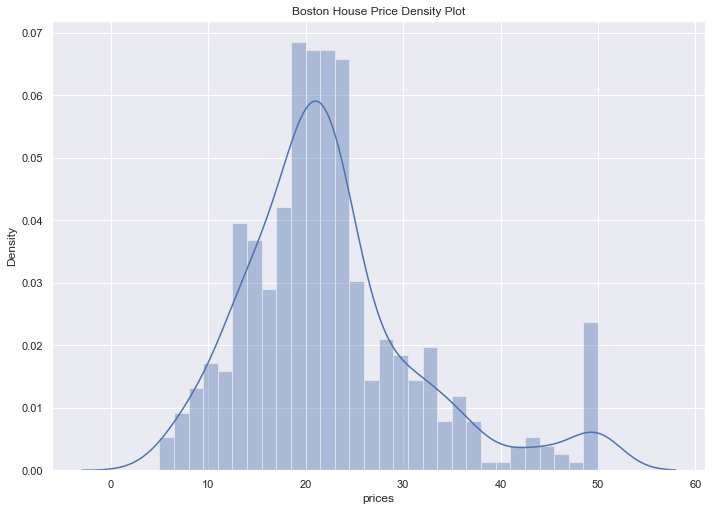

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_bos['prices'], bins=30)
plt.title('Boston House Price Density Plot')
plt.show();

### Analysis on the Target (y) variable
<p> from the View of the data distribution, can see the Prices of Boston houses are distributed normally with some few outlier </p>


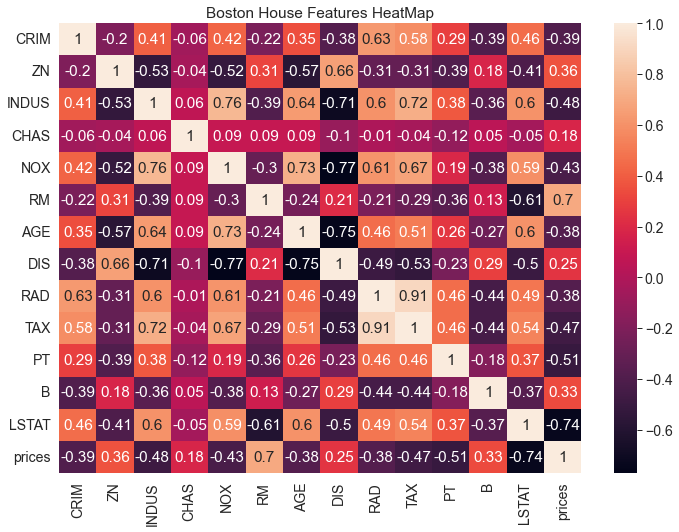

In [71]:
cor_mat = df_bos.corr().round(2)
# annot = True to print the values inside the square
plt.title("Boston House Features HeatMap")
sns.heatmap(data=cor_mat, annot=True);

#### Analysis on Correlation Matrix
</P> Note the correlation coefficient ranges from -1 to 1. Considering the CM value is close to 1, it signifies that there is a strong positive correlation between the 2 variables.</P> <P> Conversely, if it is close to -1, the variables have a strong negative correlation. </P>
#### Obversations
<p> To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).
</P> 
<P>
An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.
    
</P> 
<P>
Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

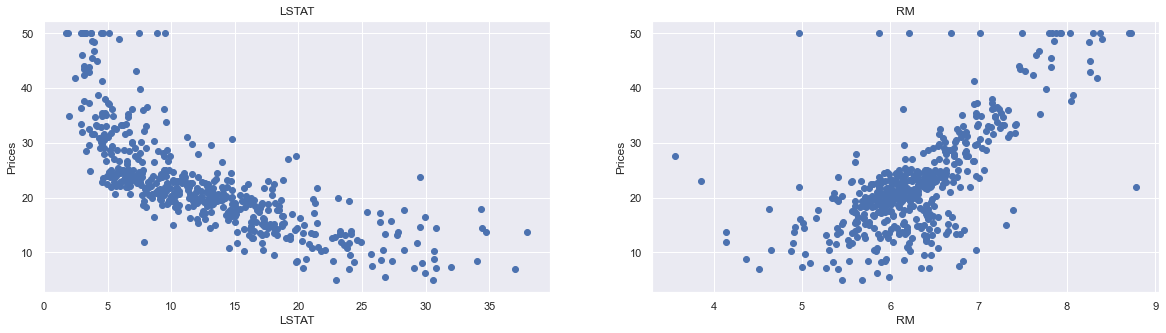

In [65]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df_bos['prices']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')

#### Observations:
The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.<p></p>
The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

#### Pre-Process the Data for training Model


In [68]:
X = pd.DataFrame(np.c_[df_bos['LSTAT'], df_bos['RM']], columns = ['lstat','RM'])
y = df_bos['prices']

#### Split Data into Training and Test sets
<p>
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.
</p>

In [69]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [72]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

### Part 4: Modelling

### Linear Regression Model
Linear Regression Steps:
<p> </p>Step 1. Import the Model you want to use.
<p> </p>Step 2. Make an instance of the Model.
<p> </p>Step 3. Training the model on the data, storing the information learned from the data Model is learning the relationship between X and y.
<p> </p>Step 4. Predict the values of new data. Uses the information the model learned during the model training process.

#### Linear Regression

<p>
</p>
Before we dive into the details of linear regression, you may be asking yourself why we are
looking at this algorithm. Isn’t it a technique from statistics?
Machine learning, more specifically the field of predictive modeling is primarily concerned
with minimizing the error of a model or making the most accurate predictions possible, at the
expense of explainability. In applied machine learning we will borrow, reuse and steal algorithms
from many different fields, including statistics and use them towards these ends.
As such, linear regression was developed in the field of statistics and is studied as a model
for understanding the relationship between input and output numerical variables, but has
been borrowed by machine learning. It is both a statistical algorithm and a machine learning
algorithm.
<p>
    Linear Assumption. Linear regression assumes that the relationship between your input
and output is linear. It does not support anything else. This may be obvious, but it is
good to remember when you have a lot of attributes. You may need to transform data to
make the relationship linear (e.g. log transform for an exponential relationship).
    <p>
</p>
 Remove Noise. Linear regression assumes that your input and output variables are
not noisy. Consider using data cleaning operations that let you better expose and clarify
the signal in your data. This is most important for the output variable and you want to
remove outliers in the output variable (y) if possible.
<p>
</p>
 Remove Collinearity. Linear regression will over-fit your data when you have highly
correlated input variables. Consider calculating pairwise correlations for your input data
and removing the most correlated.
<p>
</p>
 Gaussian Distributions. Linear regression will make more reliable predictions if your
input and output variables have a Gaussian distribution. You may get some benefit using
transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian
looking.
<p>
</p>
 Rescale Inputs: Linear regression will often make more reliable predictions if you rescale
input variables using standardization or normalization
<p>
</p>

#### Summary
Linear Regression for Machine Learning <p>
</p>
 The common names used when describing linear regression models.<p>
</p>
 The representation used by the model.<p>
</p>
 Learning algorithms used to estimate the coefficients in the model.<p>
</p>
 Rules of thumb to consider when preparing data for use with linear regression.<p>
</p>
You now know about the linear regression algorithm for making real-valued predictions. In
the next chapter you will discover how to implement the simple linear regression algorithm from
scratch.
<p></p>
<p>We use scikit-learn’s LinearRegression to train our model on both the training and test sets.</p>

In [73]:
# Import librarier for LR Model and MSE used as a metric
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [74]:
lm = LinearRegression() # instantiate Linear regression
lm.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

Evaluate LR model using RMSE and R2-Score 

In [75]:
# model evaluation for training set
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.2779428811249245
R2 score is 0.6299139905792804


The model performance for testing set
--------------------------------------
RMSE is 6.080682091989613
R2 score is 0.6459043402000768


### Part 5: Model Deployment

### Part 6: Model to Predict New Data

In [ ]:
# Include variety Clusters in the Plot
# Use Colour to differentiate
plt.scatter(df_bos['longitude'], df_bos['latitude'], c=df_bos['variety'],cmap='rainbow');

In [ ]:
path_jew = r'https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/jewellery.csv'
df_jew = pd.read_csv(path_jew)
df_jew

In [ ]:
# Include Ages' Clusters in the Plot
# Use Colour to differentiate
plt.scatter(df_jew['longitude'], df_jew['latitude'], c=df_jew['variety'],cmap='rainbow');